# 论文的写作思路
## 问题一：
- 1.1：分析这些玻璃文物纹饰、类型、颜色	、表面风化的关系；

1. 数据的清洗：空值处理、无效数据。。。

2. 卡方检验分析: 看这些变量他们两两之间的关系，之后按照卡方检验的结果来具体说明各个关系是怎么样的

变量X:{纹饰}；变量Y:{类型，颜色，表面风化}

先利用pearson卡方检验：https://www.spsspro.com/s/ae43d50fbbce4ee288266e169d06311f
再使用Yates校正卡方检验：https://www.spsspro.com/s/47df961030754e67ba387a77ad56167e


变量X:{类型}；变量Y:{颜色，表面风化}

Pearson：https://www.spsspro.com/s/0a2b3c88c7e646b49898e73277682948
Yates：https://www.spsspro.com/s/bd92dfdb3e6b44d9a87b58e115ab3266


变量X:{颜色}；变量Y:{表面风化}

Pearson: https://www.spsspro.com/s/ff53c4f1124840ed935e6f7cbc1fbdba
Ystes: https://www.spsspro.com/s/2e88c9dadc8f4f3ebfb35f18724bed67

写作过程：先写出Pearson卡方检验的相关计算公式，然后把各个图表贴上去；再写一下Pearson方法的一些弊端，为了改进，进而采用Ystes校正卡方，然后再说明公式，贴个图叭叭叭说点结论。


相关性分析：

变量X:{纹饰，类型，颜色，表面风化}；相关类型:{Spearman相关系数}
https://www.spsspro.com/s/919da963cc1f49f3a6c45ef0d56e443f

模型理论：可以摘抄一些内容上去简要的说明一下这个模型的数学理论
https://www.spsspro.com/help/correlation/#_8%E3%80%81%E6%A8%A1%E5%9E%8B%E7%90%86%E8%AE%BA


- 1.2 基于这些玻璃文物（高钾/铅钡）的类型，分析文物样品表面**有无风化**化学**成分含量**的统计规律；

1. 先做一个分类统计，统计有无风化下的类型均值：可以看到铅钡似乎更容易风化
https://www.spsspro.com/s/f243b38ab1174f309b52c04e544026d4

- 小插曲：利用SPSS得到各个化学物在各种类型的文物含量的均值，排列过后取含量前十的作为主要分析对象

2. 然后再使用分类统计，统计
分组变量： { 类型，表面风化 }； 汇总变量： { 二氧化硫(SO2)，氧化铜(CuO)，氧化钠(Na2O)，二氧化硅(SiO2)，氧化钡(BaO)，五氧化二磷(P2O5)，氧化铝(Al2O3)，氧化钾(K2O)，氧化铅(PbO)，氧化钙(CaO) }
参数：
汇总类型： { 均值，中位数，标准差，最小值，最大值 }
https://www.spsspro.com/s/a58dab3686c649448f6db44aa0bd727f

- 1.3 根据风化点检测数据，预测其风化前的化学成分含量

因为本题提供的数据较少，可以利用

岭回归求解自变量多重共线性问题（一般VIF值大于10）的一种有偏估计回归方法；这里可以讲解一下岭回归的数学模型，点那个小问号去看。然后放出岭回归的模型训练效果：https://www.spsspro.com/s/4feba961b75a43b9b9eeaf6aba81a8f2
主要看决定系数R^2的大小差异来说明训练效果的好坏，比如岭回归的决定系数只有0.7几；但是XGBoost有0.9

由于数据存在非线性关系或复杂交互作用时我们可以采用如随机森林、XGBoost，作为模型构建的方法。这里我们使用XGBoost训练一个模型
https://www.spsspro.com/s/2412e87bf99e4f24b811ff89d5a04c5e

AI解释：https://chat.minimaxi.com/share/chat/63kq1Ok6?xx=P9p4G5ObxqZx





In [3]:
## XGBoost

import numpy
import pandas
from spsspro.algorithm import supervised_learning
#生成案例数据
data_x = pandas.DataFrame({
    "A": numpy.random.random(size=100),
    "B": numpy.random.random(size=100)
})
data_y = pandas.Series(data=numpy.random.choice([1, 2], size=100), name="C")
#XGBoost回归，输入参数详细可以光标放置函数括号内按shift+tab查看，输出结果参考spsspro模板分析报告
result = supervised_learning.xgboost_regression(data_x=data_x, data_y=data_y)
print(result)

{'model_features': {'name': ['A', 'B'], 'data': [0.42399999499320984, 0.5759999752044678]}, 'models_param': {'name': ['训练用时', '数据切分', '数据洗牌', '交叉验证', '基学习器', '基学习器数量', '学习率', 'L1正则项', 'L2正则项', '样本征采样率', '树特征采样率', '节点特征采样率', '叶子节点中样本的最小权重', '树的最大深度'], 'data': ['0.304s', 0.75, '否', '否', 'gbtree', 100, 0.1, 0, 1, 1, 1, 1, 0, 'None']}, 'evaluation_indicators': {'index': ['训练集', '测试集'], 'title': ['MSE', 'RMSE', 'MAE', 'MAPE', 'R²'], 'data': [[0.002, 0.046, 0.034, 2.482, 0.992], [0.422, 0.649, 0.544, 39.424, -0.938]]}, 'train_predict': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'title': ['预测训练集结果Y', 'C', 'A', 'B'], 'data': [[1.9858183860778809, 2.0, 0.8798430786670057, 0.3360829054285598], [1.9927910566329956, 2.0, 0.17956423812135658, 0.05470451195369952], [1.8889579772949219, 2.0, 0.3592447519643318, 0.6635896484433439], [1.9156196117401123, 2.0, 0.4584468859175389, 0.8299807504091717], [1.0052694082260132, 1.0, 0.8229331168491425, 0.6774444397548937], [1.058423876762390

In [2]:
## 岭回归

import numpy
import pandas
from spsspro.algorithm import statistical_model_analysis
#生成案例数据
data_x1 = pandas.DataFrame({
    "A": numpy.random.random(size=100),
    "B": numpy.random.random(size=100)
})
data_y = pandas.Series(data=numpy.random.random(size=100), name="Y")
#岭回归，输入参数详细可以光标放置函数括号内按shift+tab查看，输出结果参考spsspro模板分析报告
result = statistical_model_analysis.ridge_regression(y=data_y, x1=data_x1)
print(result)

{'ridge_regression_analysis_result': {'data': {'data': [{'name': '常数', 'B': 0.469, 'beta': '-', 'std': 0.073, 't': 6.434, 'p': '0.000***'}, {'name': 'A', 'B': 0.107, 'beta': 0.111, 'std': 0.097, 't': 1.096, 'p': '0.276'}, {'name': 'B', 'B': -0.03, 'beta': -0.03, 'std': 0.099, 't': -0.301, 'p': '0.764'}], 'y': 'Y', 'k': 0.001, 'r2': 0.013, 'r2_adj': -0.007, 'f_value': '0.636(0.532)'}, 'description': '岭回归的结果显示：基于F检验显著性P值为0.532，水平上不呈现显著性，接受原假设，表明自变量与因变量之间不存在着回归关系。同时，模型的拟合优度R²为0.013，模型表现为较为较差。\n模型的公式：Y=0.469＋0.107 × A-0.03 × B'}, 'model_path_chart': {'data': {'independent_variable_coef': [0.111, -0.03], 'independent_variable_columns': ['A', 'B'], 'dependent_variable': 'Y'}}, 'model_result_chart': {'data': {'model_chart_data': [{'name': '真实值', 'data': [0.7218707122624418, 0.2000207556907635, 0.7025310333361847, 0.40529831398572935, 0.18978012712981196, 0.22183605977977683, 0.6437471942343346, 0.5042582145905801, 0.5654442479900349, 0.9327991145157002, 0.14403325110069365, 0.8917526820816369

# 问题二

- 数据处理流程

将原始数据集分成风化/未风化 -> 对两种状态下的数据集过采样（smote） -> 对过采样后的数据集做归一化处理 -> 利用梯度提升树分类{类型} -> 导出训练分类结果 -> 将分类结果按照类型划分训练集 -> k-means聚类分析亚类（手肘法则）


- 写作思路




## k-means

# 第一层: 分化状态下的类型分类

风化状态下第一层的聚类结果分析

聚类分析结果显示，类别1（n=32）与类别2（n=40）在多数化学成分上存在显著差异（p<0.05）。

类别2以高**二氧化硅含量（90.64±9.117）为特征**，显著高于类别1（29.823±14.157，F=486.818，p=0.000），

而类别1在铅、钡、锶等重金属氧化物上表现突出：**氧化铅（39.708±13.581 vs 1.418±4.346，F=282.677）、氧化钡（11.164±9.148 vs 0.507±1.741，F=52.106）和氧化锶（0.384±0.254 vs 0.022±0.071，F=74.023）的组间差异均达1%显著性水平**。

五氧化二磷（4.629±4.164 vs 0.335±0.213，F=42.549）与氧化钙（2.412±1.674 vs 1.058±0.49，F=23.723）在类别1中显著更高，而氧化钾则呈现反向趋势（0.133±0.225 vs 0.461±0.34，F=21.978）。氧化钠（p=0.045）、氧化铁（p=0.019）和二氧化硫（p=0.070）虽显示差异但效应较弱，其中二氧化硫仅在10%水平显著。氧化铝（p=0.576）和氧化铜（p=0.248）等未通过显著性检验，表明这些成分对聚类区分贡献有限。
标准差数据反映类别1在重金属指标上离散度更大（如氧化铅标准差达13.581），暗示其样本异质性可能高于类别2。所有显著性结果均通过方差齐性检验（F值范围4.153-486.818），支持聚类结构的化学特征可分性。

## 梯度提升树 - 第二层划分使用的方法


风化
https://www.spsspro.com/s/34a8ec5cca2f4c6c99e7743ec9e41247


- 特征重要性
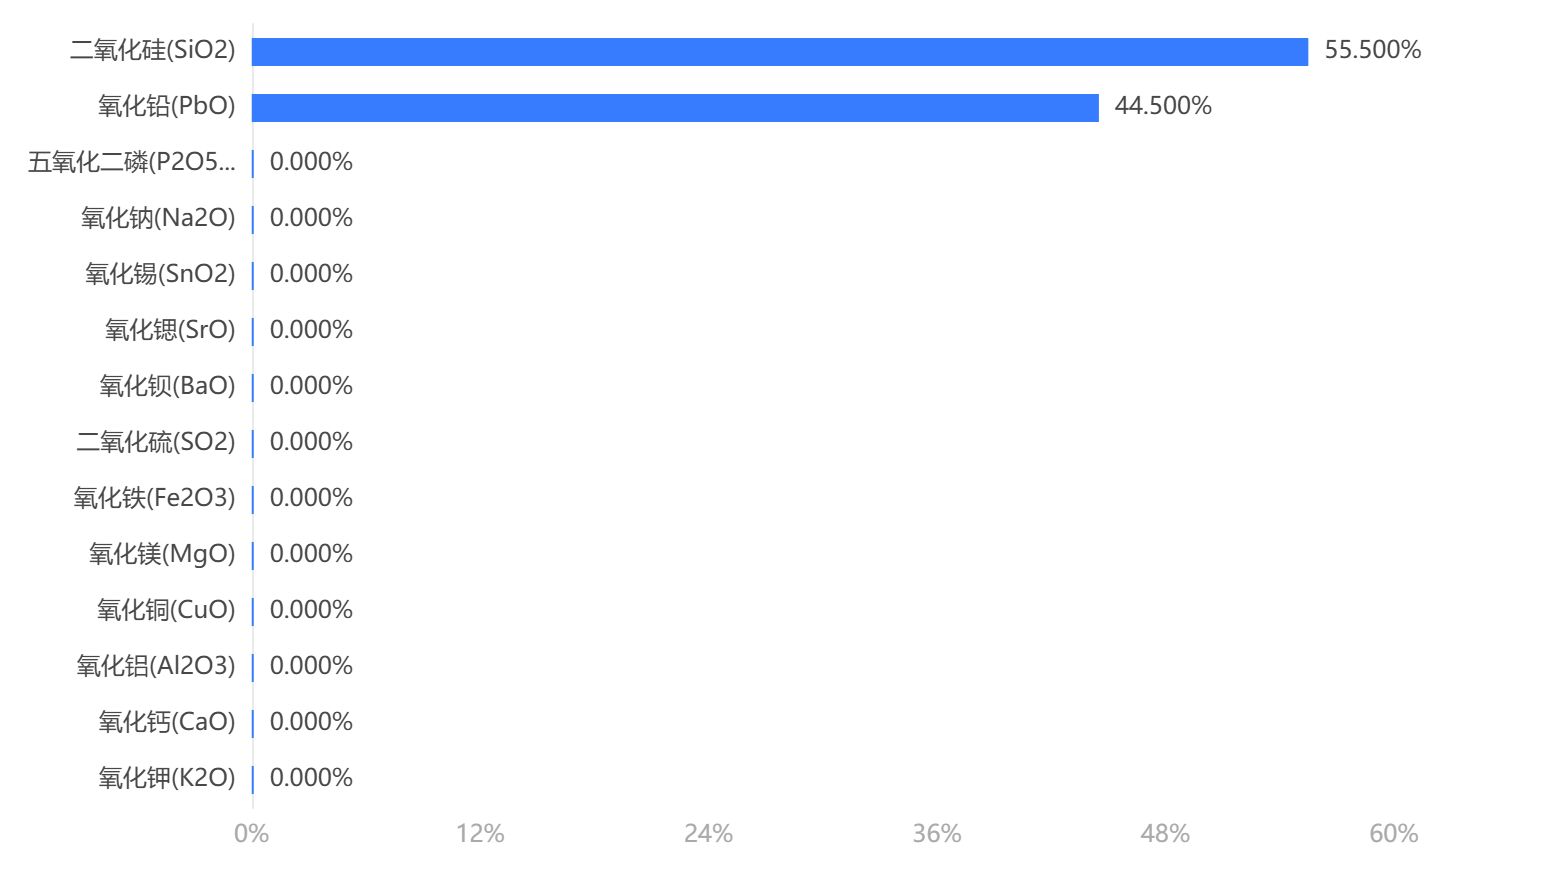

未风化
https://www.spsspro.com/s/765f08e09d22404da2be06fdbe785237

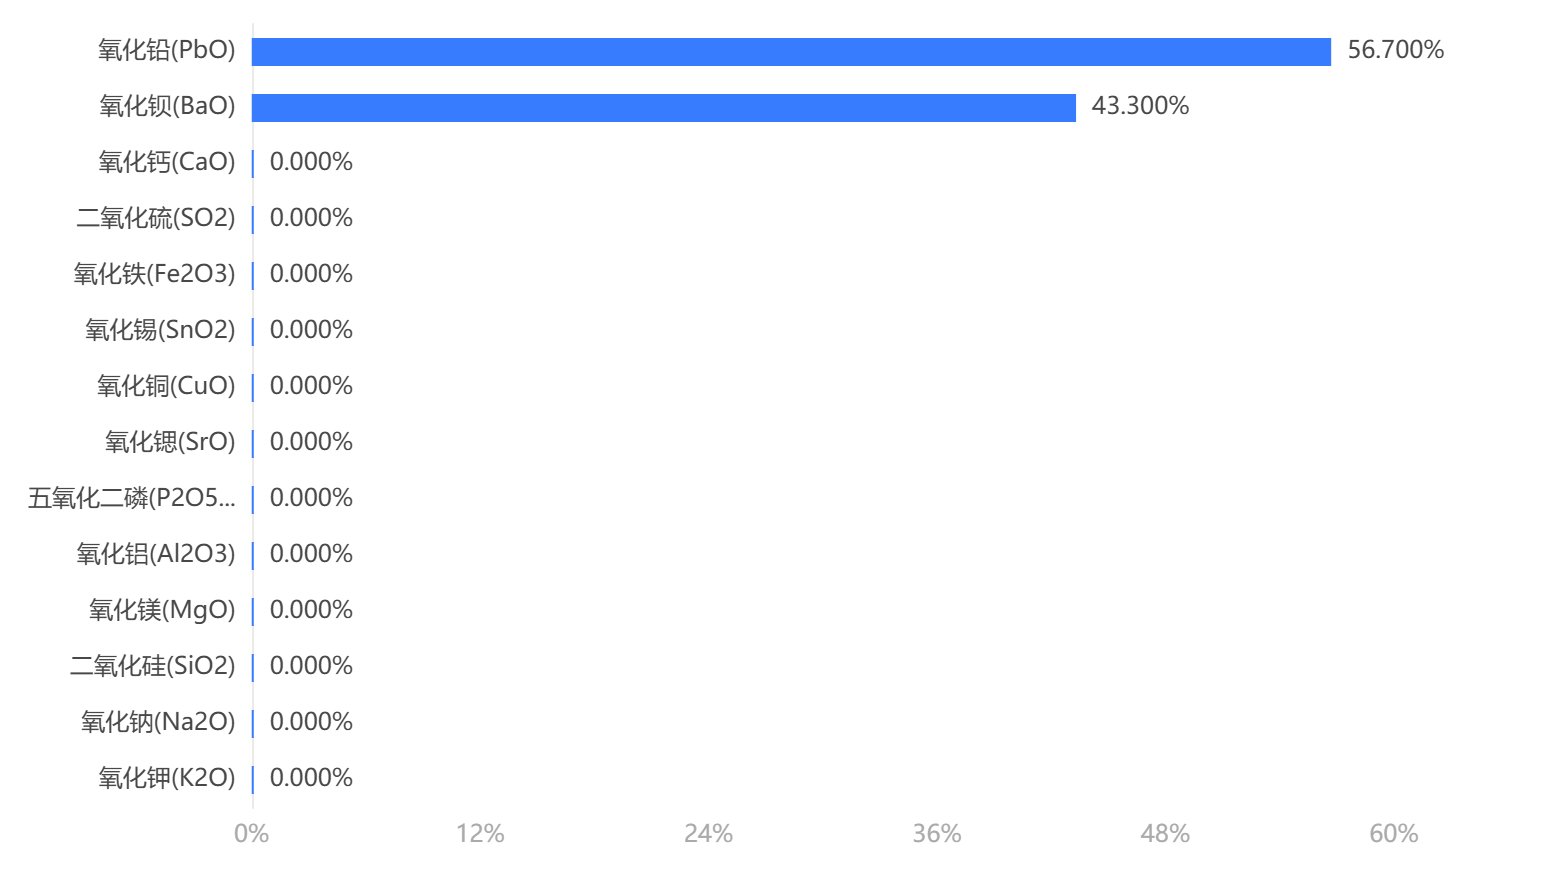


算法：
梯度提升树(GBDT)分类

变量：
变量X： { 五氧化二磷(P2O5)，氧化钠(Na2O)，氧化锡(SnO2)，氧化锶(SrO)，氧化钡(BaO)，二氧化硫(SO2)，氧化铅(PbO)，氧化铁(Fe2O3)，二氧化硅(SiO2)，氧化镁(MgO)，氧化铜(CuO)，氧化铝(Al2O3)，氧化钙(CaO)，氧化钾(K2O) }； 变量Y： { 类型 }

- 得出哪一些化学物可以对类型进行划分



## 随机森林

https://www.spsspro.com/s/346aaf1946964792b032054fb4b3b2c1


In [ ]:
import numpy
import pandas
from spsspro.algorithm import supervised_learning
#生成案例数据
data_x = pandas.DataFrame({
    "A": numpy.random.random(size=100),
    "B": numpy.random.random(size=100)
})
data_y = pandas.Series(data=numpy.random.choice([1, 2], size=100), name="C")
#随机森林分类，输入参数详细可以光标放置函数括号内按shift+tab查看，输出结果参考spsspro模板分析报告
result = supervised_learning.random_forest_classifier(data_x=data_x, data_y=data_y)
print(result)

## 第三层

聚类分析-风化-高钾：https://www.spsspro.com/s/a7dea348cd8d47a4966f91a4426c4a1e

聚类分析-风化-铅钡：https://www.spsspro.com/s/6d916984df94418eb73ab151cccd9b45

聚类分析-未风化-高钾：https://www.spsspro.com/s/55d0218b796844febfc65305cea3db6f

聚类分析-未风化-铅钡：https://www.spsspro.com/s/9fecb1fbc51c424294bdabad1bf3d24c


### 划分图

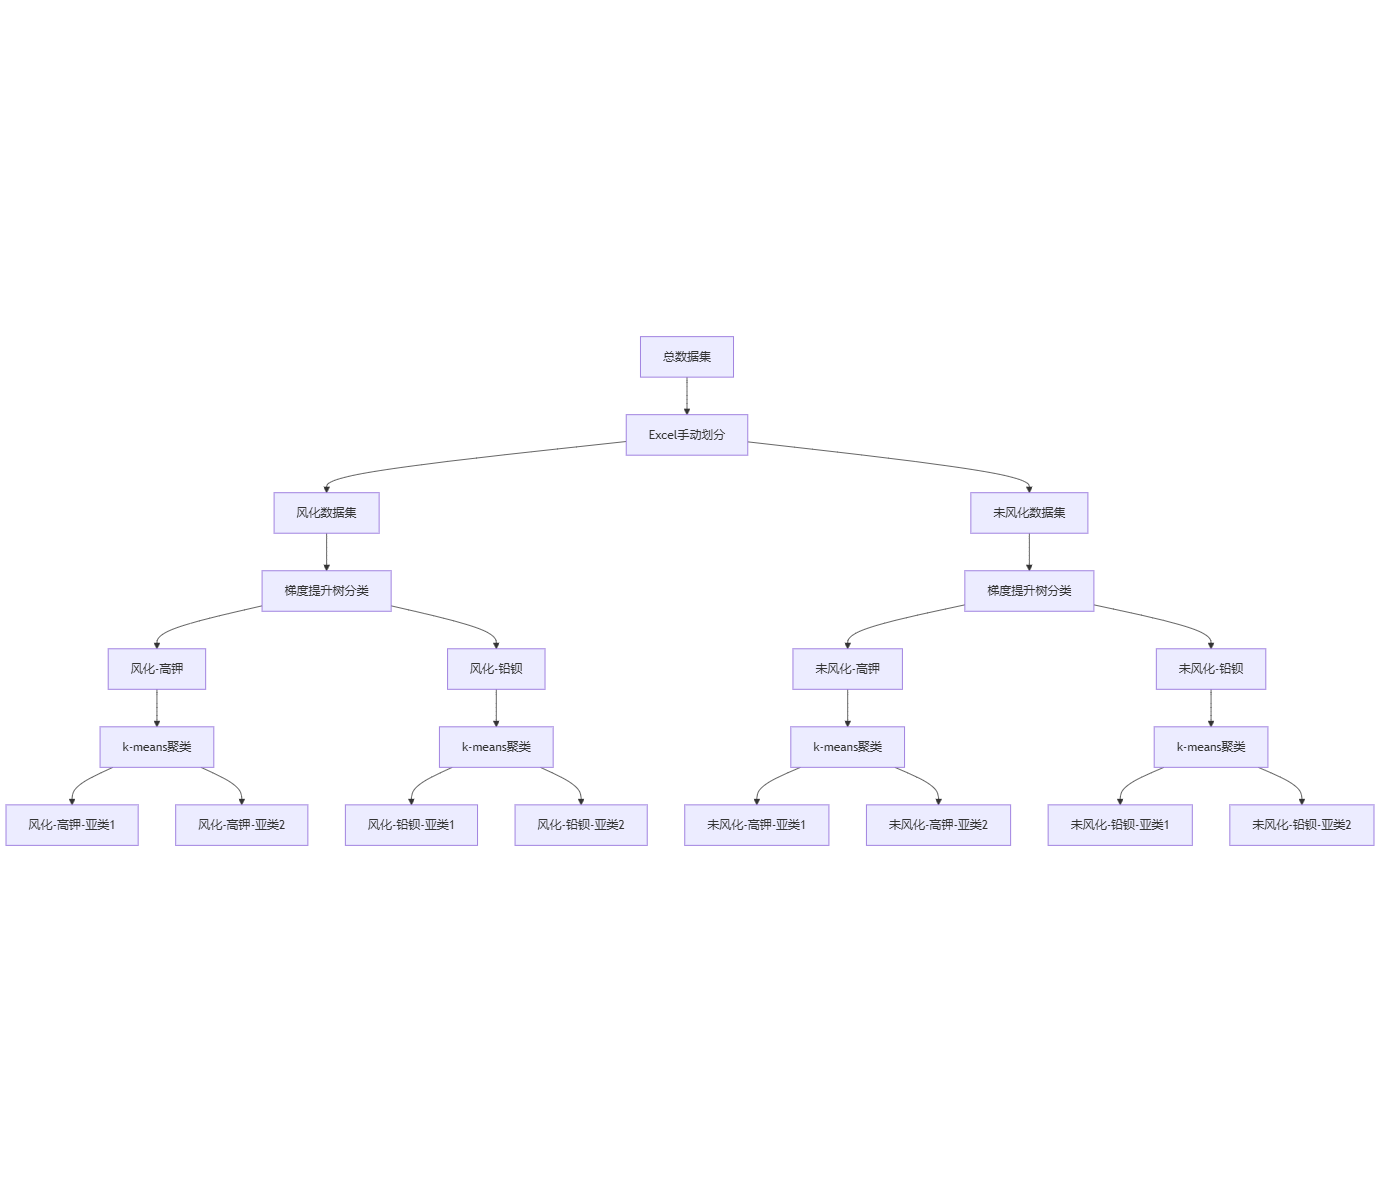

# 问题三

- 数据预处理

表单3种的数据按照风化和未风化划分 --> 对划分后的数据集做归一化处理 --> 放到模型中预测

## 风化状态下的类型预测

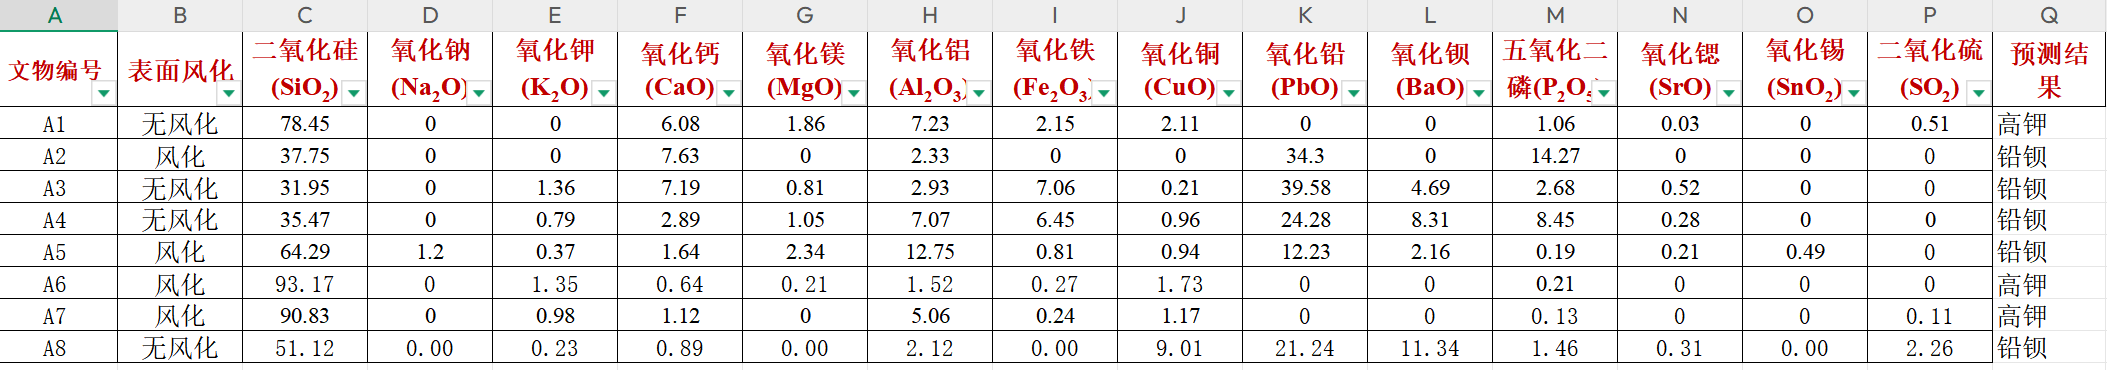

- 这里更进一步分析可以用聚类分析的模型算出亚类的归属


## 敏感性分析

